# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

# DECLARING NEEDED INFRASTRUCTURE FOR A VILLAGE TO ASSUME LIKE FULLY DEVELOPED (100%)
1. Library
2. Primary_school
3. Secondary_school
4. College
5. ATM
6. Supermarket
7. Panchayat_office
8. Post_office
9. Hospital
10. Bus_stop
11. Common_service_center

# DECLARING MINIMUM NEEDED INFRASTRUCTURE FOR A VILLAGE TO ASSUME LIKE DEVELOPED (70%)
1. Primary_school
2. Secondary_school
3. ATM
4. Panchayat_office
5. Hospital
6. Bus_stop

# CREATING DATASET WITH THE NEEDED INFRASTRUCTURE

In [2]:
dataset= pd.DataFrame({
    'library': np.random.randint(0,2,20000),
    'primary_school':np.random.randint(0,2,20000),
    'secondary_school':np.random.randint(0,2,20000),
    'college':np.random.randint(0,2,20000),
    'atm':np.random.randint(0,2,20000),
    'supermarket':np.random.randint(0,2,20000),
    'panchayat_office':np.random.randint(0,2,20000),
    'post_office':np.random.randint(0,2,20000),
    'hospital':np.random.randint(0,2,20000),
    'bus_stop':np.random.randint(0,2,20000),
    'common_service_center':np.random.randint(0,2,20000),
})
print(dataset.shape)
dataset.head()

(20000, 11)


,library,primary_school,secondary_school,college,atm,supermarket,panchayat_office,post_office,hospital,bus_stop,common_service_center
0,1,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,1,1,0,0,1,1,1
2,1,1,0,0,1,1,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,1,1
4,0,1,1,0,1,1,1,1,0,1,1


# MODIFICATING THE DATASET

In [3]:
all_columns= dataset.columns

In [4]:
specific_columns= ["primary_school", "secondary_school", "atm", "panchayat_office", "hospital", "bus_stop"]

In [5]:
# selecting 4500 random rows to allocate 1 to all columns
rows_for_allones= dataset.sample(n=4500,random_state=42).index

In [6]:
# selecting 500 random rows to allocate 1 to only 6 specific columns
rows_for_keyinfra= dataset.drop(index=rows_for_allones).sample(n=500, random_state=24).index

In [7]:
dataset.loc[rows_for_allones, all_columns]= 1

In [8]:
dataset.loc[rows_for_keyinfra, specific_columns]= 1

In [9]:
# checking fully developed villages
mask1= (dataset==1).all(axis=1)

In [10]:
allones= dataset[mask1]
print(allones.shape)
allones.head()

(4523, 11)


,library,primary_school,secondary_school,college,atm,supermarket,panchayat_office,post_office,hospital,bus_stop,common_service_center
0,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1
17,1,1,1,1,1,1,1,1,1,1,1
19,1,1,1,1,1,1,1,1,1,1,1


In [12]:
# checking villages with minimum needed infrastructure
mask2= ["primary_school", "secondary_school", "atm", "panchayat_office", "hospital", "bus_stop"]
villages_with_min_needed_features = dataset[(dataset[mask2].sum(axis=1) == 6)]
print(villages_with_min_needed_features.shape)
villages_with_min_needed_features.head()

(5239, 11)


,library,primary_school,secondary_school,college,atm,supermarket,panchayat_office,post_office,hospital,bus_stop,common_service_center
0,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1
17,1,1,1,1,1,1,1,1,1,1,1
19,1,1,1,1,1,1,1,1,1,1,1


# APPLYING WEIGHTAGE TO SPECIFIC COLUMNS

In [13]:
weights = {
    "primary_school": 2, "secondary_school": 2, "atm": 2, "panchayat_office": 2, 
    "hospital": 2, "bus_stop": 2, "library": 1, "college": 1, "supermarket": 1, 
    "post_office": 1, "common_service_center": 1
}

In [14]:
dataset["weighted_score"] = dataset[list(weights.keys())].mul(weights).sum(axis=1)

# Normalize the score to a percentage (Total max score = 6*2 + 5*1 = 17)
dataset["weighted_development_score"] = (dataset["weighted_score"] / sum(weights.values())) * 100
dataset.drop(columns=["weighted_score"], inplace=True)
dataset.head()

,library,primary_school,secondary_school,college,atm,supermarket,panchayat_office,post_office,hospital,bus_stop,common_service_center,weighted_development_score
0,1,1,1,1,1,1,1,1,1,1,1,100.000000
1,0,0,0,1,1,1,0,0,1,1,1,52.941176
2,1,1,0,0,1,1,0,0,1,0,0,47.058824
3,1,1,1,1,1,1,1,1,1,1,1,100.000000
4,0,1,1,0,1,1,1,1,0,1,1,76.470588


In [19]:
min_req_features = ["primary_school", "secondary_school", "atm", "panchayat_office", "hospital", "bus_stop"]
villages_with_min_req_features = dataset[(dataset[min_req_features].sum(axis=1) == 6) & (dataset.drop(columns=["weighted_development_score"] + min_req_features).sum(axis=1) == 0)]
print(villages_with_min_req_features.shape)
villages_with_min_req_features.head()

(22, 12)


,library,primary_school,secondary_school,college,atm,supermarket,panchayat_office,post_office,hospital,bus_stop,common_service_center,weighted_development_score
689,0,1,1,0,1,0,1,0,1,1,0,70.588235
1671,0,1,1,0,1,0,1,0,1,1,0,70.588235
3827,0,1,1,0,1,0,1,0,1,1,0,70.588235
3867,0,1,1,0,1,0,1,0,1,1,0,70.588235
3885,0,1,1,0,1,0,1,0,1,1,0,70.588235


# ADDING TARGET VARIABLE COLUMN TO THE DATASET

In [ ]:
dataset["developed"] = (dataset["weighted_development_score"] > 70).astype(int)

# getting developed villages data
num_developed_villages = dataset["developed"].sum()

# Total number of villages
total_villages = len(dataset)

num_developed_villages, total_villages


In [10]:
dataset['developed']= (dataset==1).all(axis=1).astype(int)

In [11]:
dataset.head()

,library,primary_school,secondary_school,college,atm,supermarket,panchayat_office,post_office,hospital,bus_stop,common_service_center,developed
0,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,0,1,0,0,1,0,0,0,0


# SAVING DATASET AS CSV FILE

In [12]:
dataset.to_csv('Village_infras.csv',index= False)

In [26]:
import pandas as pd
df= pd.read_csv("Village_infras.csv")

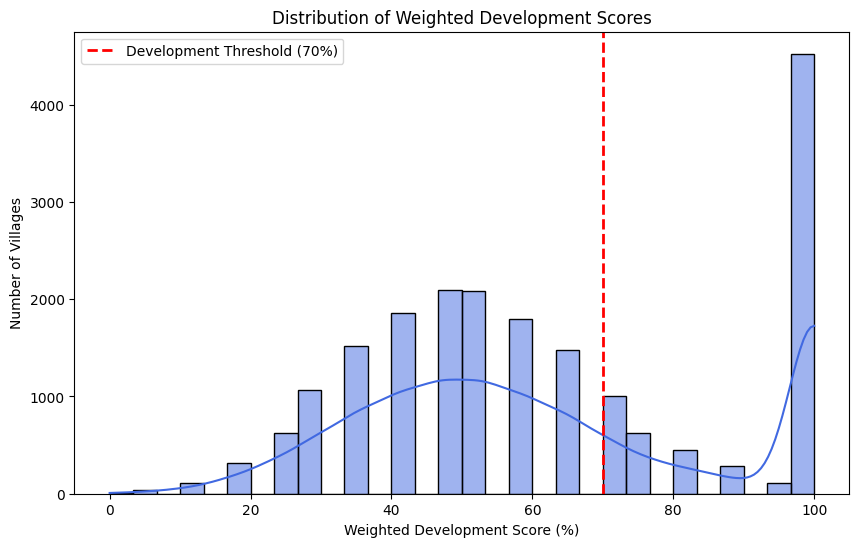

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.histplot(df["weighted_development_score"], bins=30, kde=True, color="royalblue")

# Add labels and title
plt.xlabel("Weighted Development Score (%)")
plt.ylabel("Number of Villages")
plt.title("Distribution of Weighted Development Scores")
plt.axvline(70, color='red', linestyle='dashed', linewidth=2, label="Development Threshold (70%)")
plt.legend()

# Show plot
plt.show()